In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset = 'drive/MyDrive/Preprocessed_dataset.xlsx'
df = pd.read_excel(dataset)
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(20492, 33)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Assuming 'target_column' is the name of your target variable column
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11) 

In [ ]:
from sklearn.metrics import classification_report

# Initialize and train the ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=250, random_state=11)
etc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = etc.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = etc.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4710
           1       0.83      0.09      0.17       413

    accuracy                           0.93      5123
   macro avg       0.88      0.55      0.57      5123
weighted avg       0.92      0.93      0.90      5123

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4710
           1       0.46      0.42      0.44       413

    accuracy                           0.91      5123
   macro avg       0.70      0.69      0.70      5123
weighted avg       0.91      0.91      0.91      5123



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
etc = ExtraTreesClassifier(n_estimators=250, random_state=11)
etc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = etc.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = etc.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4710
           1       0.41      0.34      0.37       413

    accuracy                           0.91      5123
   macro avg       0.68      0.65      0.66      5123
weighted avg       0.90      0.91      0.90      5123

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4710
           1       0.36      0.44      0.39       413

    accuracy                           0.89      5123
   macro avg       0.65      0.68      0.67      5123
weighted avg       0.90      0.89      0.90      5123



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the ExtraTreesClassifier
etc = ExtraTreesClassifier(
    n_estimators=250,
    random_state=11,
    class_weight='balanced',  # Handle imbalance
    max_depth=20,             # Example tuned parameter
    min_samples_split=5,      # Example tuned parameter
    min_samples_leaf=2        # Example tuned parameter
)
etc.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = etc.predict(X_test)
y_proba = etc.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = etc.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4710
           1       0.32      0.46      0.38       413

    accuracy                           0.88      5123
   macro avg       0.64      0.69      0.66      5123
weighted avg       0.90      0.88      0.89      5123

ROC-AUC: 0.7932666060054595
PR-AUC: 0.3559907059387663
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4710
           1       0.33      0.45      0.38       413

    accuracy                           0.88      5123
   macro avg       0.64      0.69      0.66      5123
weighted avg       0.90      0.88      0.89      5123



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10), # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None], # The number of features to consider when looking for the best split
    'class_weight': ['balanced', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=11),  # Use your ExtraTreesClassifier
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try (adjust as needed)
    cv=5,       # Number of cross-validation folds (adjust as needed)
    scoring='f1',  # Scoring metric (you can change this)
    n_jobs=-1,    # Use all available CPU cores
    verbose=1,    # Print progress updates
    random_state=11 # Set a random state for reproducibility
)

# Fit the random search to the resampled training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_etc = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_etc.predict(X_test)
y_proba = best_etc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

# Find optimal threshold using the best model
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 293}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4710
           1       0.43      0.42      0.43       413

    accuracy                           0.91      5123
   macro avg       0.69      0.69      0.69      5123
weighted avg       0.91      0.91      0.91      5123

ROC-AUC: 0.8203513209234897
PR-AUC: 0.4069265196448312
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4710
           1       0.39      0.47      0.43       413

    accuracy                           0.90      5123
   macro avg       0.67      0.70      0.69      5123
weighted avg       0.91      0.90      0.90      5123



In [ ]:
data = 'drive/MyDrive/Preprocessed_dataset.xlsx'
df2 = pd.read_excel(data)
df2.shape

(20492, 33)

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'target_column' is the name of your target variable column
X = df2.drop('hospital_death', axis=1)
y = df2['hospital_death']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11) # Adjust test_size and random_state as needed

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=250, random_state=11)
etc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = etc.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = etc.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4710
           1       0.83      0.09      0.17       413

    accuracy                           0.93      5123
   macro avg       0.88      0.55      0.57      5123
weighted avg       0.92      0.93      0.90      5123

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4710
           1       0.46      0.42      0.44       413

    accuracy                           0.91      5123
   macro avg       0.70      0.69      0.70      5123
weighted avg       0.91      0.91      0.91      5123



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
etc = ExtraTreesClassifier(n_estimators=250, random_state=11)
etc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = etc.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = etc.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply the optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4710
           1       0.41      0.34      0.37       413

    accuracy                           0.91      5123
   macro avg       0.68      0.65      0.66      5123
weighted avg       0.90      0.91      0.90      5123

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4710
           1       0.36      0.44      0.39       413

    accuracy                           0.89      5123
   macro avg       0.65      0.68      0.67      5123
weighted avg       0.90      0.89      0.90      5123



In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report

smote_tomek = SMOTETomek(random_state=11) # Adjust random_state as needed
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize and train the CatBoostClassifier
cbm = CatBoostClassifier(iterations=350,  # Adjust iterations as needed
                           learning_rate=0.1, # Adjust learning rate as needed
                           random_seed=111,
                           loss_function='Logloss', # Adjust loss function if needed
                           eval_metric='PRAUC') #Adjust evaluation metric as needed

cbm.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test), verbose=20) # Adjust verbose as needed

# Make predictions on the test set
y_pred = cbm.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

In [ ]:
cbm.save_model('catboost_model72.cbm')

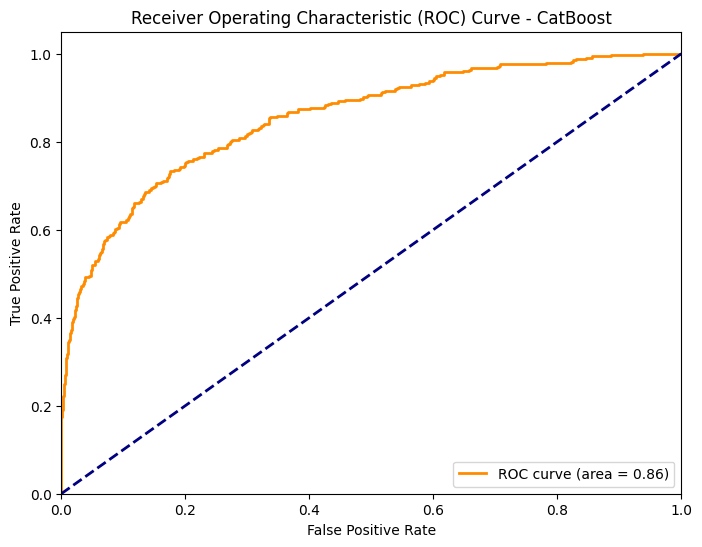

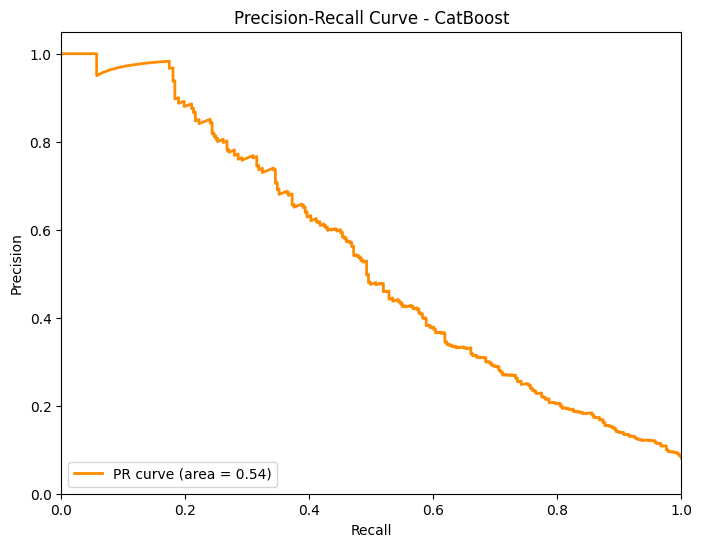

CatBoost ROC AUC: 0.8550
CatBoost PR AUC: 0.5350


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Make predictions and get probabilities for CatBoost
y_pred_cb = cbm.predict(X_test)
y_proba_cb = cbm.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_proba_cb)
roc_auc_cb = auc(fpr_cb, tpr_cb)

# Calculate PR AUC
precision_cb, recall_cb, _ = precision_recall_curve(y_test, y_proba_cb)
pr_auc_cb = average_precision_score(y_test, y_proba_cb)


# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost')
plt.legend(loc="lower right")
plt.show()

# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_cb, precision_cb, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc_cb:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CatBoost')
plt.legend(loc="lower left")
plt.show()

print(f"CatBoost ROC AUC: {roc_auc_cb:.4f}")
print(f"CatBoost PR AUC: {pr_auc_cb:.4f}")
